## **Data import**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, auc, classification_report,cohen_kappa_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install pyAgrum

In [ ]:
from pyAgrum.skbn import BNClassifier

In [ ]:
training = pd.read_csv('/content/gdrive/MyDrive/TAI/reduced_training_set.csv')
testing = pd.read_csv('/content/gdrive/MyDrive/TAI/reduced_testing_set.csv')

In [ ]:
training.head(5)

,Patient ID,original_shape_Elongation,original_firstorder_Skewness,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet-LHL_glrlm_LongRunEmphasis,wavelet-LHL_glrlm_RunPercentage,wavelet-HHH_glrlm_RunLengthNonUniformityNormalized,wavelet-LHH_glrlm_ShortRunEmphasis,wavelet-LHL_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis,...,wavelet2-LLL_glcm_Contrast,wavelet2-LHH_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-HHH_firstorder_90Percentile,log-sigma-3-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis,original_firstorder_Kurtosis.1,wavelet2-HLL_firstorder_RootMeanSquared,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,Label
0,34,0.746498,0.308239,15.166667,1.483094,1.231011,0.779418,0.905023,0.762728,30.000000,...,21.472746,0.464768,0.971789,0.199476,1.627599,38.364922,9.675926,1.000196,0.923905,0
1,76,0.629092,0.397052,4194.479987,23.678905,0.405498,0.389592,0.634210,0.204996,703.296082,...,214.424383,0.347917,0.380856,0.008536,2.051976,3.412361,3.241028,1.329506,0.896269,1
2,34,0.784976,0.993808,12.800000,1.911518,1.107642,0.822129,0.934434,0.616016,15.800000,...,6.343563,0.306492,0.909483,0.128263,2.777778,16.701131,20.000000,0.996453,0.928254,0
3,46,0.577087,0.710759,2896.170217,15.066560,0.485534,0.396913,0.639746,0.223692,1765.250000,...,70.835116,0.358830,0.466787,0.001531,2.603525,7.192055,220.845578,1.402542,0.895293,0
4,75,0.830552,0.522244,738.784091,6.039749,0.667421,0.484016,0.689224,0.284998,2168.602273,...,52.121725,0.359239,1.302800,0.000626,2.354637,16.746710,17.550530,1.114944,0.910136,1


In [ ]:
# train_id = training.iloc[:, 0]
X_train = training.iloc[:, 1:-1]
y_train = training.iloc[:, -1]
# test_id = testing.iloc[:, 0]
X_test = testing.iloc[:, 1:-1]
y_test = testing.iloc[:, -1]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2434, 38)
(2434,)
(1128, 38)
(1128,)


# **Decision Tree**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'class_weight': None, 'max_depth': 6, 'max_features': 8}


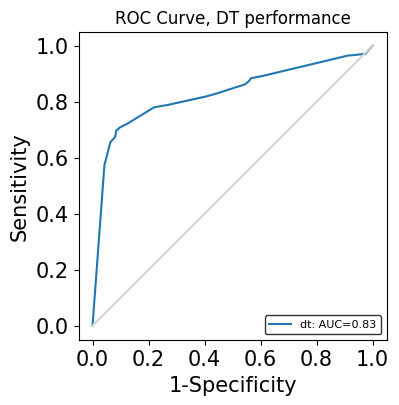

AUC: 0.8280672721674877
Accuracy: 0.6072695035460993
Sensitivity: 0.8318965517241379
Specificity: 0.5491071428571429
F1 Score: 0.46562123039806996
5-fold cross-validation ROC AUC: 0.7385653701684236
5-fold cross-validation Accuracy: 0.6803508505082769
5-fold cross-validation Sensiticity: 0.632824427480916
5-fold cross-validation Precision: 0.7407291293645162
5-fold cross-validation F1 Score: 0.6794731564748012
running time: 0:00:01.057018


<Figure size 640x480 with 0 Axes>

In [ ]:
# reduced_X_train, reduced_X_test, y_train, y_test
random.seed(42)
# parameters for GridSearchCV
parameters = {'max_depth':[6, 8], 'max_features':[4,6,8],'class_weight':[None,'balanced',{0:2,1:1,2:2}]}
Dtree = DecisionTreeClassifier()
# GridSearchCV finding best parameters
dt_grid = GridSearchCV(Dtree, parameters, verbose=1, n_jobs=1, cv=5, scoring='f1_micro')
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)

dt_start_time = datetime.datetime.now()
# Decision tree model training
Dtree = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)
Dtree.fit(X_train,y_train)
# get the predicted labels
dt_predictions = Dtree.predict(X_test)
# get the predicted probilities of being positive labels
dt_probs = Dtree.predict_proba(X_test)[:, 1]
# construct the confusion matrix
confusion = confusion_matrix(y_test, dt_predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
dt_AUC = roc_auc_score(y_test, dt_probs)
dt_ACC = accuracy_score(y_test, dt_predictions)
dt_Sen = TP / float(TP+FN)
dt_Spe = TN / float(TN+FP)
dt_F1 = f1_score(y_test, dt_predictions)
# 5-fold validation
dt_scores = cross_validate(Dtree, X_train, y_train, cv=5, scoring = ['roc_auc', 'accuracy', 'recall', 'precision', 'f1'], return_train_score = True)
dt_cv_AUC = dt_scores['test_roc_auc'].mean()
dt_cv_ACC = dt_scores['test_accuracy'].mean()
dt_cv_Sen = dt_scores['test_recall'].mean()
dt_cv_Pre = dt_scores['test_precision'].mean()
dt_cv_F1 = dt_scores['test_f1'].mean()
# roc curve
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probs, pos_label=None, sample_weight=None, drop_intermediate=True)
dt_auc = roc_auc_score(y_test, dt_probs)
plt.figure(figsize=(6, 4))
plt.plot(dt_fpr, dt_tpr, label='dt: AUC={0:0.2f}'.format(dt_auc))
plt.title("ROC Curve, DT performance")
plt.xlabel('1-Specificity', fontsize=15)
plt.ylabel('Sensitivity', fontsize=15)
plt.axis('square')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,1], [0,1], ls = '-', c = 'lightgrey')# 'r--'
plt.rcParams.update({'font.size': 8})
plt.legend(loc="lower right", edgecolor='black')
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/dt_roc.jpg")

print("AUC: %s" % (dt_AUC))
print("Accuracy: %s" % (dt_ACC))
print("Sensitivity: %s" % (dt_Sen))
print("Specificity: %s" % (dt_Spe))
print("F1 Score: %s" % (dt_F1))

print("5-fold cross-validation ROC AUC: %s" % (dt_cv_AUC))
print("5-fold cross-validation Accuracy: %s" % (dt_cv_ACC))
print("5-fold cross-validation Sensiticity: %s" % (dt_cv_Sen))
print("5-fold cross-validation Precision: %s" % (dt_cv_Pre))
print("5-fold cross-validation F1 Score: %s" % (dt_cv_F1))

dt_end_time = datetime.datetime.now()
dt_running_time = dt_end_time - dt_start_time
print('running time: %s'%(dt_running_time))



# **Multi-layer Perceptron**

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'alpha': 0.0001, 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling'}


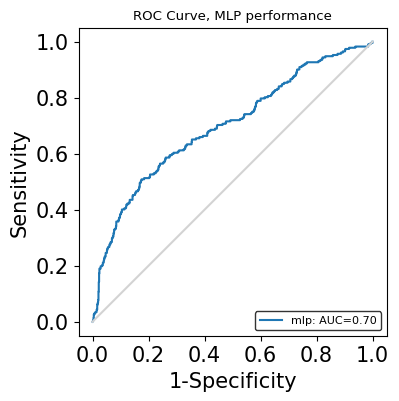

Multi-layer Perceptron
AUC: 0.6977563115763546
Accuracy: 0.399822695035461
Sensitivity: 0.8793103448275862
Specificity: 0.27566964285714285
F1 Score: 0.376036866359447
5-fold cross-validation ROC AUC: 0.6833696080213255
5-fold cross-validation Accuracy: 0.6433890198663186
5-fold cross-validation Sensiticity: 0.7053435114503817
5-fold cross-validation Precision: 0.669059171133416
5-fold cross-validation F1 Score: 0.6711904006229904
running time: 0:00:04.687723


<Figure size 640x480 with 0 Axes>

In [ ]:

parameters = {'learning_rate':['constant', 'invscaling'], 'alpha':[0.001, 0.0001, 0.00001], 'hidden_layer_sizes':np.arange(50, 150, 25)}

mlp = MLPClassifier()
mlp_grid = GridSearchCV(mlp, parameters, verbose=1, n_jobs=1,cv=5,scoring='f1_micro')
mlp_grid.fit(X_train, y_train)
print(mlp_grid.best_params_)

mlp_start_time = datetime.datetime.now()

mlp = MLPClassifier(**mlp_grid.best_params_, random_state=42)
mlp.fit(X_train,y_train)
mlp_predictions = mlp.predict(X_test)
mlp_probs = mlp.predict_proba(X_test)[:, 1]
confusion = confusion_matrix(y_test, mlp_predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
mlp_AUC = roc_auc_score(y_test, mlp_probs)
mlp_ACC = accuracy_score(y_test, mlp_predictions)
mlp_Sen = TP / float(TP+FN)
mlp_Spe = TN / float(TN+FP)
mlp_F1 = f1_score(y_test, mlp_predictions)

mlp_scores = cross_validate(mlp, X_train, y_train, cv=5, scoring = ['roc_auc', 'accuracy', 'recall', 'precision', 'f1'], return_train_score = True)
mlp_cv_AUC = mlp_scores['test_roc_auc'].mean()
mlp_cv_ACC = mlp_scores['test_accuracy'].mean()
mlp_cv_Sen = mlp_scores['test_recall'].mean()
mlp_cv_Pre = mlp_scores['test_precision'].mean()
mlp_cv_F1 = mlp_scores['test_f1'].mean()

mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(y_test, mlp_probs, pos_label=None, sample_weight=None, drop_intermediate=True)
mlp_auc = roc_auc_score(y_test, mlp_probs)

plt.figure(figsize=(6, 4))
plt.plot(mlp_fpr, mlp_tpr, label='mlp: AUC={0:0.2f}'.format(mlp_auc))
plt.title("ROC Curve, MLP performance")
plt.xlabel('1-Specificity', fontsize=15)
plt.ylabel('Sensitivity', fontsize=15)
plt.axis('square')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,1], [0,1], ls = '-', c = 'lightgrey')# 'r--'
plt.rcParams.update({'font.size': 8})
plt.legend(loc="lower right", edgecolor='black')
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/mlp_roc.jpg")

print("Multi-layer Perceptron")
print("AUC: %s" % (mlp_AUC))
print("Accuracy: %s" % (mlp_ACC))
print("Sensitivity: %s" % (mlp_Sen))
print("Specificity: %s" % (mlp_Spe))
print("F1 Score: %s" % (mlp_F1))

print("5-fold cross-validation ROC AUC: %s" % (mlp_cv_AUC))
print("5-fold cross-validation Accuracy: %s" % (mlp_cv_ACC))
print("5-fold cross-validation Sensiticity: %s" % (mlp_cv_Sen))
print("5-fold cross-validation Precision: %s" % (mlp_cv_Pre))
print("5-fold cross-validation F1 Score: %s" % (mlp_cv_F1))

mlp_end_time = datetime.datetime.now()
mlp_running_time = mlp_end_time - mlp_start_time
print('running time: %s'%(mlp_running_time))


# **Bayesian networks**

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learningMethod': 'TAN', 'prior': 'Smoothing', 'scoringType': 'AIC'}


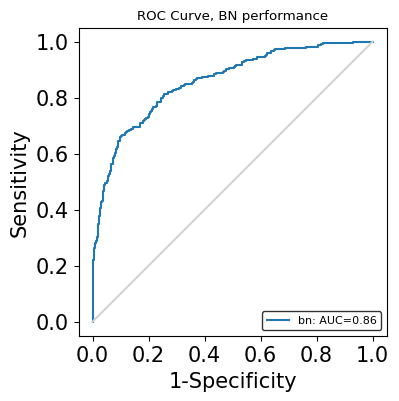

Bayesian Network
AUC: 0.8568397860221675
Accuracy: 0.6622340425531915
Sensitivity: 0.875
Specificity: 0.6071428571428571
F1 Score: 0.5158831003811944
5-fold cross-validation ROC AUC: nan
5-fold cross-validation Accuracy: 0.7091227892277402
5-fold cross-validation Sensiticity: 0.6946564885496183
5-fold cross-validation Precision: 0.7488712242881922
5-fold cross-validation F1 Score: 0.719363680669652
running time: 0:00:29.150904


<Figure size 640x480 with 0 Axes>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

parameters = {'learningMethod':['GHC', 'MIIC', 'TAN']
              ,'prior':['Smoothing', 'BDeu', None]
              ,'scoringType':['AIC', 'BIC', 'Log2']}

bn = BNClassifier()
bn_grid = GridSearchCV(bn, parameters, verbose=1, n_jobs=1,cv=5,scoring='f1_micro')
bn_grid.fit(X_train, y_train)
print(bn_grid.best_params_)

bn_start_time = datetime.datetime.now()

bn = BNClassifier(**bn_grid.best_params_)
bn.fit(X_train,y_train)
bn_predictions = bn.predict(X_test)
bn_probs = bn.predict_proba(X_test)[:, 1]
confusion = confusion_matrix(y_test, bn_predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
bn_AUC = roc_auc_score(y_test, bn_probs)
bn_ACC = accuracy_score(y_test, bn_predictions)
bn_Sen = TP / float(TP+FN)
bn_Spe = TN / float(TN+FP)
bn_F1 = f1_score(y_test, bn_predictions)

bn_scores = cross_validate(bn, X_train, y_train, cv=5, scoring = ['roc_auc', 'accuracy', 'recall', 'precision', 'f1'], return_train_score = True)
bn_cv_AUC = bn_scores['test_roc_auc'].mean()
bn_cv_ACC = bn_scores['test_accuracy'].mean()
bn_cv_Sen = bn_scores['test_recall'].mean()
bn_cv_Pre = bn_scores['test_precision'].mean()
bn_cv_F1 = bn_scores['test_f1'].mean()

bn_fpr, bn_tpr, bn_thresholds = roc_curve(y_test, bn_probs, pos_label=None, sample_weight=None, drop_intermediate=True)
bn_auc = roc_auc_score(y_test, bn_probs)

plt.figure(figsize=(6, 4))
plt.plot(bn_fpr, bn_tpr, label='bn: AUC={0:0.2f}'.format(bn_auc))
plt.title("ROC Curve, BN performance")
plt.xlabel('1-Specificity', fontsize=15)
plt.ylabel('Sensitivity', fontsize=15)
plt.axis('square')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,1], [0,1], ls = '-', c = 'lightgrey')# 'r--'
plt.rcParams.update({'font.size': 8})
plt.legend(loc="lower right", edgecolor='black')
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/bn_roc.jpg")

print("Bayesian Network")
print("AUC: %s" % (bn_AUC))
print("Accuracy: %s" % (bn_ACC))
print("Sensitivity: %s" % (bn_Sen))
print("Specificity: %s" % (bn_Spe))
print("F1 Score: %s" % (bn_F1))

print("5-fold cross-validation ROC AUC: %s" % (bn_cv_AUC))
print("5-fold cross-validation Accuracy: %s" % (bn_cv_ACC))
print("5-fold cross-validation Sensiticity: %s" % (bn_cv_Sen))
print("5-fold cross-validation Precision: %s" % (bn_cv_Pre))
print("5-fold cross-validation F1 Score: %s" % (bn_cv_F1))

bn_end_time = datetime.datetime.now()
bn_running_time = bn_end_time - bn_start_time
print('running time: %s'%(bn_running_time))


# **Random Forest**



Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 500}


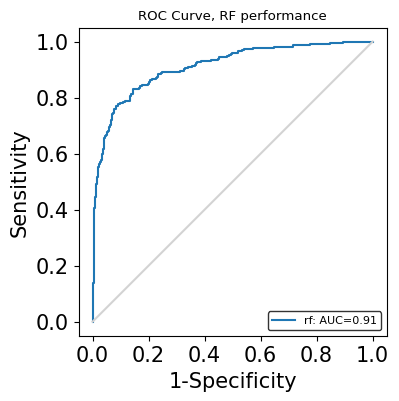

Random Forest
AUC: 0.9105747767857143
Accuracy: 0.7526595744680851
Sensitivity: 0.8922413793103449
Specificity: 0.7165178571428571
F1 Score: 0.5974025974025975
5-fold cross-validation ROC AUC: 0.8312949836423119
5-fold cross-validation Accuracy: 0.7551381178120854
5-fold cross-validation Sensiticity: 0.7129770992366413
5-fold cross-validation Precision: 0.810433799012889
5-fold cross-validation F1 Score: 0.7581424516624521
running time: 0:00:32.562359


<Figure size 640x480 with 0 Axes>

In [ ]:
parameters = { 
    'n_estimators': [200, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 8, 10]}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, parameters, verbose=1, n_jobs=1,cv=5,scoring='f1_micro')
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

rf_start_time = datetime.datetime.now()

rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
confusion = confusion_matrix(y_test, rf_predictions)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
rf_AUC = roc_auc_score(y_test, rf_probs)
rf_ACC = accuracy_score(y_test, rf_predictions)
rf_Sen = TP / float(TP+FN)
rf_Spe = TN / float(TN+FP)
rf_F1 = f1_score(y_test, rf_predictions)

rf_scores = cross_validate(rf, X_train, y_train, cv=5, scoring = ['roc_auc', 'accuracy', 'recall', 'precision', 'f1'], return_train_score = True)
rf_cv_AUC = rf_scores['test_roc_auc'].mean()
rf_cv_ACC = rf_scores['test_accuracy'].mean()
rf_cv_Sen = rf_scores['test_recall'].mean()
rf_cv_Pre = rf_scores['test_precision'].mean()
rf_cv_F1 = rf_scores['test_f1'].mean()

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs, pos_label=None, sample_weight=None, drop_intermediate=True)
rf_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(6, 4))
plt.plot(rf_fpr, rf_tpr, label='rf: AUC={0:0.2f}'.format(rf_auc))
plt.title("ROC Curve, RF performance")
plt.xlabel('1-Specificity', fontsize=15)
plt.ylabel('Sensitivity', fontsize=15)
plt.axis('square')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,1], [0,1], ls = '-', c = 'lightgrey')# 'r--'
plt.rcParams.update({'font.size': 8})
plt.legend(loc="lower right", edgecolor='black')
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/rf_roc.jpg")

print("Random Forest")
print("AUC: %s" % (rf_AUC))
print("Accuracy: %s" % (rf_ACC))
print("Sensitivity: %s" % (rf_Sen))
print("Specificity: %s" % (rf_Spe))
print("F1 Score: %s" % (rf_F1))

print("5-fold cross-validation ROC AUC: %s" % (rf_cv_AUC))
print("5-fold cross-validation Accuracy: %s" % (rf_cv_ACC))
print("5-fold cross-validation Sensiticity: %s" % (rf_cv_Sen))
print("5-fold cross-validation Precision: %s" % (rf_cv_Pre))
print("5-fold cross-validation F1 Score: %s" % (rf_cv_F1))

rf_end_time = datetime.datetime.now()
rf_running_time = rf_end_time - rf_start_time
print('running time: %s'%(rf_running_time))


Plot all roc curves

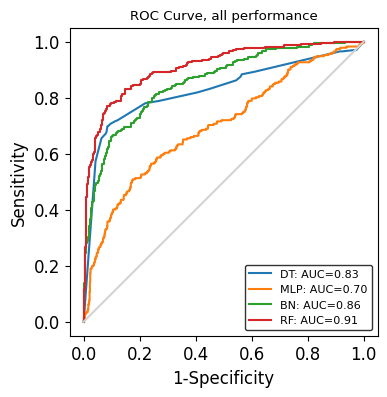

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(dt_fpr, dt_tpr, label='DT: AUC={0:0.2f}'.format(dt_AUC))
plt.plot(mlp_fpr, mlp_tpr, label='MLP: AUC={0:0.2f}'.format(mlp_AUC))
plt.plot(bn_fpr, bn_tpr, label='BN: AUC={0:0.2f}'.format(bn_AUC))
plt.plot(rf_fpr, rf_tpr, label='RF: AUC={0:0.2f}'.format(rf_AUC))
plt.title("ROC Curve, all performance")
plt.xlabel('1-Specificity', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.axis('square')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([0,1], [0,1], ls = '-', c = 'lightgrey')# 'r--'
#plt.grid(True)
plt.rcParams.update({'font.size': 8})
plt.legend(loc="best", edgecolor='black')
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/all_roc.jpg")

The best model is random forest, get the predictions as the labels of micros for task 2

In [ ]:
test_predictions = rf_predictions
train_predictions = rf.predict(X_train)

In [ ]:
position = training.shape[1]-1
training.insert(position, 'Micro Label', train_predictions.tolist())
testing.insert(position, 'Micro Label', test_predictions.tolist())

In [ ]:
training.head(5)

,Patient ID,original_shape_Elongation,original_firstorder_Skewness,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet-LHL_glrlm_LongRunEmphasis,wavelet-LHL_glrlm_RunPercentage,wavelet-HHH_glrlm_RunLengthNonUniformityNormalized,wavelet-LHH_glrlm_ShortRunEmphasis,wavelet-LHL_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis,...,wavelet2-LHH_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-HHH_firstorder_90Percentile,log-sigma-3-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis,original_firstorder_Kurtosis.1,wavelet2-HLL_firstorder_RootMeanSquared,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,Micro Label,Label
0,34,0.746498,0.308239,15.166667,1.483094,1.231011,0.779418,0.905023,0.762728,30.000000,...,0.464768,0.971789,0.199476,1.627599,38.364922,9.675926,1.000196,0.923905,0,0
1,76,0.629092,0.397052,4194.479987,23.678905,0.405498,0.389592,0.634210,0.204996,703.296082,...,0.347917,0.380856,0.008536,2.051976,3.412361,3.241028,1.329506,0.896269,1,1
2,34,0.784976,0.993808,12.800000,1.911518,1.107642,0.822129,0.934434,0.616016,15.800000,...,0.306492,0.909483,0.128263,2.777778,16.701131,20.000000,0.996453,0.928254,0,0
3,46,0.577087,0.710759,2896.170217,15.066560,0.485534,0.396913,0.639746,0.223692,1765.250000,...,0.358830,0.466787,0.001531,2.603525,7.192055,220.845578,1.402542,0.895293,0,0
4,75,0.830552,0.522244,738.784091,6.039749,0.667421,0.484016,0.689224,0.284998,2168.602273,...,0.359239,1.302800,0.000626,2.354637,16.746710,17.550530,1.114944,0.910136,1,1


In [ ]:
testing.head(5)

,Patient ID,original_shape_Elongation,original_firstorder_Skewness,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet-LHL_glrlm_LongRunEmphasis,wavelet-LHL_glrlm_RunPercentage,wavelet-HHH_glrlm_RunLengthNonUniformityNormalized,wavelet-LHH_glrlm_ShortRunEmphasis,wavelet-LHL_glrlm_RunLengthNonUniformityNormalized,log-sigma-3-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis,...,wavelet2-LHH_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-HHH_firstorder_90Percentile,log-sigma-3-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis,original_firstorder_Kurtosis.1,wavelet2-HLL_firstorder_RootMeanSquared,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,Micro Label,Label
0,42,0.348600,0.786427,2062.303210,13.252299,0.498778,0.420325,0.659345,0.219646,2964.800238,...,0.371176,0.512931,0.012509,2.951188,7.469105,126.468425,1.435609,0.892774,0,0
1,69,0.520017,0.683662,280.163227,4.257438,0.821070,0.401405,0.550825,0.399486,1279.592871,...,0.273735,0.747168,0.011861,2.308772,68.406658,13.966745,1.632029,0.969084,1,1
2,37,0.742012,0.445384,51.105263,2.867227,0.903385,0.649728,0.858228,0.450085,46.078947,...,0.454472,0.915131,0.450587,2.218344,82.666960,7.876736,0.996548,1.000000,0,0
3,42,0.397422,0.912152,812.318708,6.567451,0.693505,0.402897,0.654554,0.348718,1691.498781,...,0.368862,1.098508,0.008294,3.415089,62.312843,457.776639,1.455127,0.958663,0,0
4,24,0.650720,0.531621,2010.663748,17.950744,0.454577,0.343794,0.623606,0.235585,2706.204010,...,0.379908,1.094894,0.006382,2.354761,56.375511,6.796109,1.291926,0.978299,1,0


In [ ]:
training.to_csv('/content/gdrive/MyDrive/TAI/reduced_training_set_with_micro_label.csv', index=False)
testing.to_csv('/content/gdrive/MyDrive/TAI/reduced_testing_set_with_micro_label.csv', index=False)

Map all results to a table

In [ ]:
stat = ["AUC", "Accuracy", "Sensitivity", "Specificity", "F1 Score", "5-fold cv AUC"
        , "5-fold cv Accuracy", "5-fold cv Sensitivity", "5-fold cv Precision", "5-fold cv F1 Score", "Running time (second)"]

dt_result = [dt_AUC, dt_ACC, dt_Sen, dt_Spe, dt_F1, dt_cv_AUC, dt_cv_ACC, dt_cv_Sen, dt_cv_Pre, dt_cv_F1, dt_running_time.total_seconds()]
mlp_result = [mlp_AUC, mlp_ACC, mlp_Sen, mlp_Spe, mlp_F1, mlp_cv_AUC, mlp_cv_ACC, mlp_cv_Sen, mlp_cv_Pre, mlp_cv_F1, mlp_running_time.total_seconds()]
bn_result = [bn_AUC, bn_ACC, bn_Sen, bn_Spe, bn_F1, bn_cv_AUC, bn_cv_ACC, bn_cv_Sen, bn_cv_Pre, bn_cv_F1, bn_running_time.total_seconds()]
rf_result = [rf_AUC, rf_ACC, rf_Sen, rf_Spe, rf_F1, rf_cv_AUC, rf_cv_ACC, rf_cv_Sen, rf_cv_Pre, rf_cv_F1, rf_running_time.total_seconds()]

# round to 2 decimals
for i in range(len(dt_result)):
  dt_result[i] = round(dt_result[i], 2)
  mlp_result[i] = round(mlp_result[i], 2)
  bn_result[i] = round(bn_result[i], 2)
  rf_result[i] = round(rf_result[i], 2)

result_df = pd.DataFrame({" ":stat, "DT": dt_result, "MLP": mlp_result, "BN": bn_result, "RF": rf_result})
result_df.to_csv('/content/gdrive/MyDrive/TAI/result_task1.csv', index=False)

result_df

,,DT,MLP,BN,RF
0,AUC,0.83,0.70,0.86,0.91
1,Accuracy,0.61,0.40,0.66,0.75
2,Sensitivity,0.83,0.88,0.88,0.89
3,Specificity,0.55,0.28,0.61,0.72
4,F1 Score,0.47,0.38,0.52,0.60
5,5-fold cv AUC,0.74,0.68,NaN,0.83
6,5-fold cv Accuracy,0.68,0.64,0.71,0.76
7,5-fold cv Sensitivity,0.63,0.71,0.69,0.71
8,5-fold cv Precision,0.74,0.67,0.75,0.81
9,5-fold cv F1 Score,0.68,0.67,0.72,0.76
